# Manihot LIGNUM sky configuration

In [1]:
# Import packages
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Import sky output csv
df = pd.read_csv("../manihot-sky/output.txt", sep=',', names = ["inclination", "x", "y", "z", "radiation_intensity"])

In [3]:
# Check that the data isn't funky
df.head(10)

,inclination,x,y,z,radiation_intensity
0,0,0.999508,0.000000,0.031376,2.28447
1,1,0.977666,0.207809,0.031376,2.28447
2,2,0.913096,0.406536,0.031376,2.28447
3,3,0.808619,0.587496,0.031376,2.28447
4,4,0.668801,0.742779,0.031376,2.28447
5,5,0.499754,0.865599,0.031376,2.28447
6,6,0.308865,0.950588,0.031376,2.28447
7,7,0.104477,0.994032,0.031376,2.28447
8,8,-0.104477,0.994032,0.031376,2.28447
9,9,-0.308865,0.950588,0.031376,2.28447


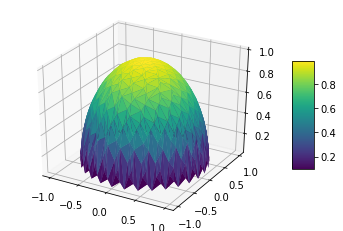

In [4]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['y'], df['x'], df['z'], cmap=plt.cm.viridis, linewidth=0.01)

# Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['y'], df['x'], df['z'], cmap=plt.cm.viridis, linewidth=0.01)
fig.colorbar( surf, shrink=0.5, aspect=5)

plt.show()


In [19]:
# Well this looks okay but why don't we give ploty a go???
import plotly.graph_objects as go

In [28]:
fig = go.Figure(data=[go.Mesh3d(x=(df["x"]),
                   y=(df["y"]),
                   z=(df["z"])),
                   color='rgba(244,22,100,0.6)'
                  ])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-100,100],),
                     yaxis = dict(nticks=4, range=[-50,100],),
                     zaxis = dict(nticks=4, range=[-100,100],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

SyntaxError: invalid syntax (<ipython-input-28-04456f860086>, line 4)